<h2> DATA 319: Model-based and Data-based Methods for Data Analytics. Summer 2024 </h2>
<h3> Problem Set 1 </h3>
<h3> Group <i> (Insert your group number here) </i></h3>
<h3> Type students' names <i> (only those who contributed to the group work)</i> here</h3>

#### 1. In your own words, provide a definition or description for each of the following (and explain how they are different for the pairs of items):

##### (a) Scatterplot vs Hexagon plot
    Scatter plots are 2 dimensional plots where data points are represented by (x,y) coordinate pairs on a plane. The hexagon plot is similar to scatter plot but it addresses the problem of having too many points very close to each other. Instead the plane is tiled into hexagonal bins and the bin is color coded to repreesent how many points fall in it.

##### (b) Marginal distribution vs Conditional distribution
    A marginal distribution describes an outcome independent of other outcomes (i.e probability that x happens) a conditional distribution describes the probabilitty of an event happening based on a different event happening (i.e. probability of x happening if y happened [X | Y])

##### (c) Probability mass function vs Probability density function
    A probability mass function is used to describe discrete variables. If you are tossing a coin you will always get a whole integer number of outcomes, you cannot get 1.2 heads. The Probability Density Function is used to describe continuous variables where values can fall on any number in a range.

##### (d) Statistical independence
    Statistical independence means that two variable's outcomes have absolutely no effect on each other.

##### (e) Simpson's paradox
    Simpson's paradox describes the situation where examining groups of data can produce trends that disappear or are contradictory to the trends that appear when examining the data as a whole.

#### 2. In your own words, provide brief responses to the following:

##### (a) What problem was MapReduce introduced to solve?
    Map Reduce was introduced to solve the problem of processing very large data sets with limited bandwidth. MapReduce allows for parallel processing meaning multiple clusters of data can be queued and processed at the same time.
##### (b) What are the differences between the Map and Reduce steps?
    The Map step first reads all of the data and creates keys for the values, then it groups the data by the keys. The Reduce step then groups, counts, or aggregates the data based on the keys created.
##### (c) What is skew in MapReduce?
    Skew in MapReduce is what happens when there is an uneven distribution of data resulting in some keys having more values than others. This has an effect on the performance of the map reduce function because it means some tasks take longer than others.
    

#### 3. Consider the two dimensional random variable (X, Y) with probability distribution given by:

| X/Y | 0 | 1 | 
|:-:|:-:|:-:|
| **0** | 0 | .20 |
| **1** | .15 | .10 |
| **2** | .25 | .30 |

##### (a) Compute the marginal distributions of X and Y.
x: 0 = 0.4          y:  0 = 0.20
   1 = 0.6              1 = 0.25
                        3 = 0.55

##### (b) Compute the expected values and variances of X and Y.
E(x) = 0(.35) + 1 (.60) = .60
E(y) = 0(.20) + 1(.25) + 2(.55) = 1.35 
##### (c) Compute the covariance of X and Y using the joint distribution.
    E(XY) - E(X) * E(Y)
    0.7 - 0.60 * 1.35 = -0.11

##### (d) What is the distribution of X conditioned on Y=1?
    x: 0 = 0.33
       1 = 0.16
       2 = 0.50

##### (e) Fill in the values *a-f* below so that the new distribution has the same marginals as X and Y but the resulting variables are independent:

| X/Y | 0 | 1 | 
|:-:|:-:|:-:|
| **0** |*0.08*|*0.12*|
| **1** |*0.1*|*0.15*|
| **2** |*0.22*|*0.33*|


In [3]:
##Code For Above
import pandas as pd
import numpy as np
#PART A - C
joint_dist = pd.DataFrame({
    '0': [0, .15, .25],
    '1': [.20, .10, .30]
}, index=['0', '1', '2'])

Marginal_dist_X = joint_dist.sum(axis = 0)
Marginal_dist_Y = joint_dist.sum(axis = 1)
E_X = np.sum(Marginal_dist_X.index.astype(float) * Marginal_dist_X)
E_Y = np.sum(Marginal_dist_Y.index.astype(float) * Marginal_dist_Y)

E_XY = np.sum(joint_dist.values * np.outer(joint_dist.index.astype(float), joint_dist.columns.astype(float)))

cov_XY = E_XY - E_X * E_Y

print(f'Marginal X: {Marginal_dist_X}\nMarginal Y: {Marginal_dist_Y}\nE(x): {E_X}\nE(y): {E_Y}\nE(XY): {E_XY}\nCov(X, Y): {cov_XY}')
#PART D
joint_prob_X_Y1 = joint_dist['1']
marginal_prob_Y1 = Marginal_dist_X['1']
conditional_dist_X_given_Y1 = joint_prob_X_Y1 / marginal_prob_Y1

print("Conditional Distribution of X given Y=1:\n", conditional_dist_X_given_Y1)
#PART E
marginal_dist_X = joint_dist.sum(axis = 1)
marginal_dist_Y = joint_dist.sum(axis = 0)
ind_dist = pd.DataFrame(index = joint_dist.index, columns = joint_dist.columns)
for x in ind_dist.index:
    for y in ind_dist.columns:
        ind_dist.loc[x, y] = marginal_dist_X[x] * marginal_dist_Y[y]
print(ind_dist)



Marginal X: 0    0.4
1    0.6
dtype: float64
Marginal Y: 0    0.20
1    0.25
2    0.55
dtype: float64
E(x): 0.6000000000000001
E(y): 1.35
E(XY): 0.7
Cov(X, Y): -0.11000000000000021
Conditional Distribution of X given Y=1:
 0    0.333333
1    0.166667
2    0.500000
Name: 1, dtype: float64
      0     1
0  0.08  0.12
1   0.1  0.15
2  0.22  0.33


#### 4. Load in the Los Angeles Air Quality (LA_AQ) dataset.

##### (a) Construct all of the pairwise scatterplots for the variables of the dataset.
    See Below

##### (b) Compute sample means, covariances, and correlations of these variables.
    See Below

##### (c) Create heatmaps for the covariances and correlations from part (b) separately. Which of these two heatmaps is more informative/useful? Why?  What do you observe about these visualiations?
    The Correlation Heatmap is far more useful than the covariance heatplot because it shows the relationship between the two variables. Other than the diagonal line of 1 correlation that shows our variables correlating with themselves which is not useful, It is helpful and easy to see which variables might be influencing each other based on the color of the cell. For instance we can see that there is a fairly strong correlation between the CO and NO columns, and a lack of a correlation between the Solar Radiation and HC Columns

##### (d) Report any interesting findings from your exploratory numerical and visual analyses.
    There are certainly some links between columns that could be investigated for causation, particularly between NO2 and CO2 readings. The pairwise scatterplots also have some interesting shapes that could be interesting to examine. 

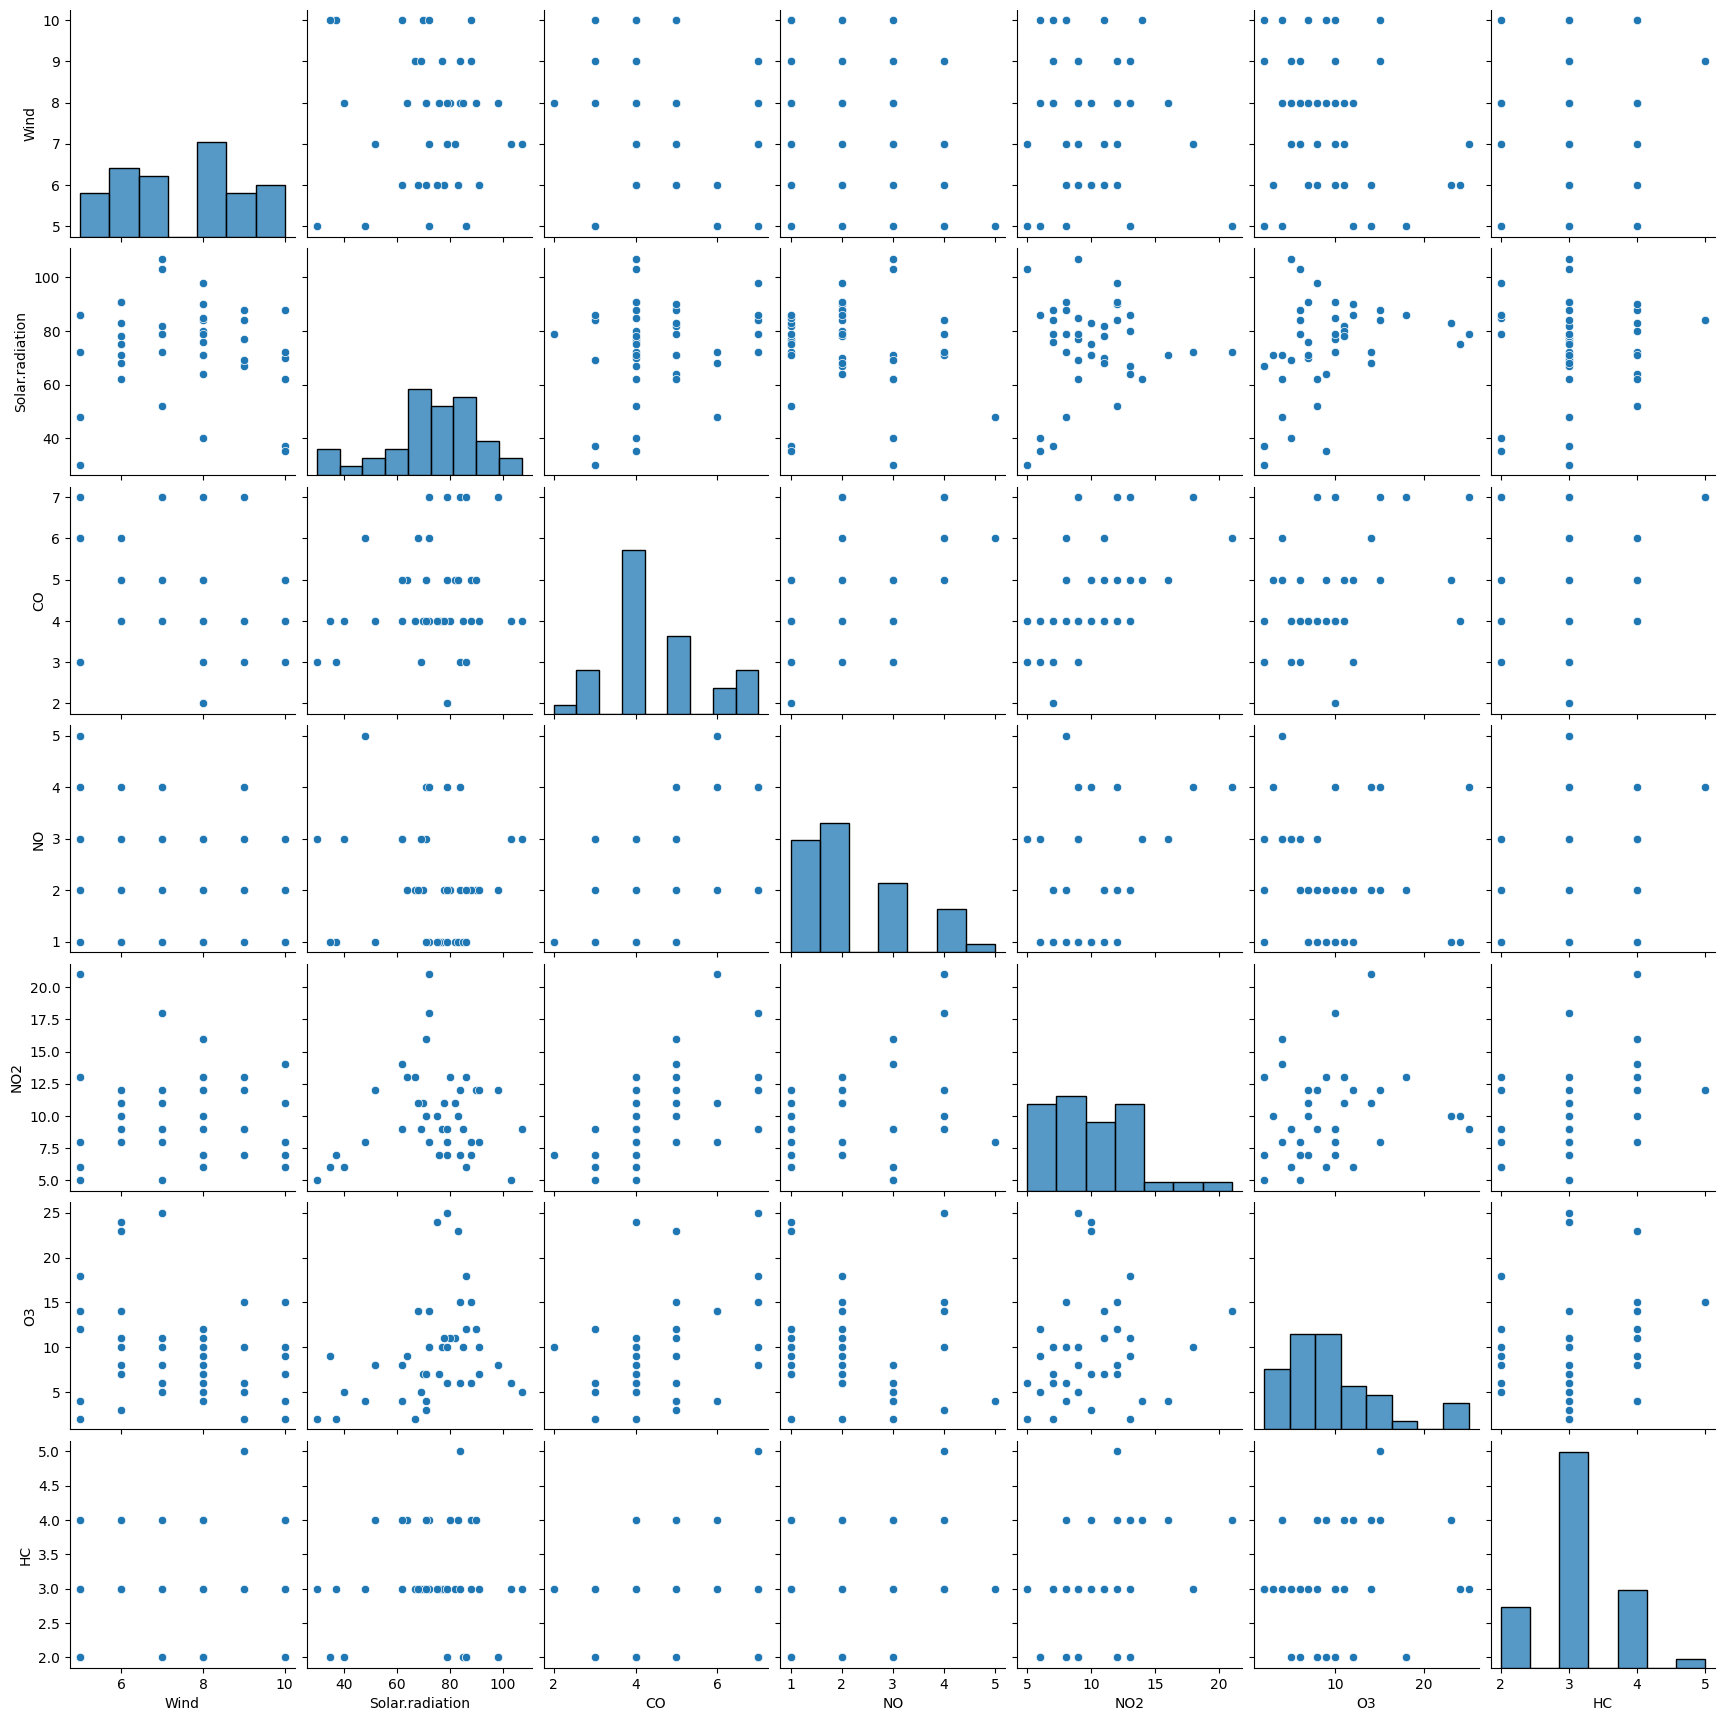

Means:
Wind                7.500000
Solar.radiation    73.857143
CO                  4.547619
NO                  2.190476
NO2                10.047619
O3                  9.404762
HC                  3.095238
dtype: float64

Covariances:
                     Wind  Solar.radiation        CO        NO        NO2  \
Wind             2.500000        -2.780488 -0.378049 -0.463415  -0.585366   
Solar.radiation -2.780488       300.515679  3.909408 -1.386760   6.763066   
CO              -0.378049         3.909408  1.522067  0.673635   2.314750   
NO              -0.463415        -1.386760  0.673635  1.182346   1.088269   
NO2             -0.585366         6.763066  2.314750  1.088269  11.363531   
O3              -2.231707        30.790941  2.821719 -0.810685   3.126597   
HC               0.170732         0.623693  0.141696  0.176539   1.044135   

                        O3        HC  
Wind             -2.231707  0.170732  
Solar.radiation  30.790941  0.623693  
CO                2.821719 

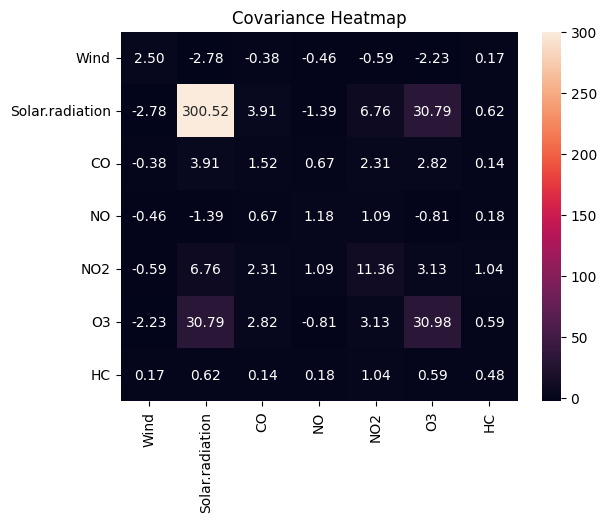

<function matplotlib.pyplot.show(close=None, block=None)>

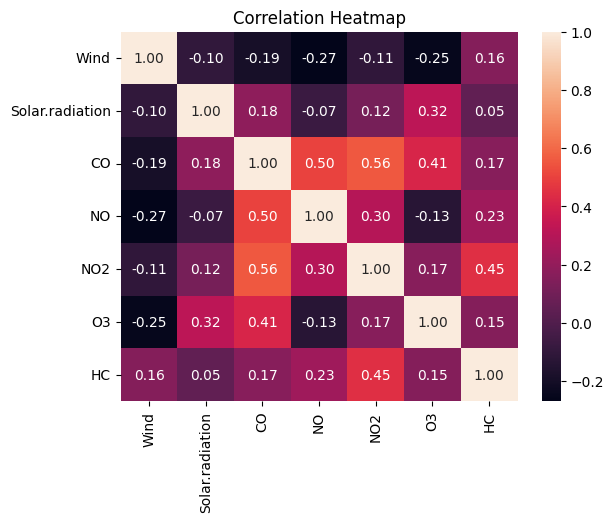

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
LA_AQ = pd.DataFrame(pd.read_csv(r'/Volumes/T7 Shield APFS/Data-319-Model-Data-Based-Methods/Problem Set 1/LA_AQ.csv')) #Load Data

#Part A
sns.pairplot(LA_AQ)
plt.show()

#Part B
mean = LA_AQ.mean()
cov = LA_AQ.cov()
corr = LA_AQ.corr()
print(f'Means:\n{mean}\n\nCovariances:\n{cov}\n\nCorrelations:\n{corr}')

#Part C
sns.heatmap(cov, annot = True, fmt='.2f')
plt.title('Covariance Heatmap')
plt.show()

sns.heatmap(corr, annot = True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show






#### 5. Design a MapReduce algorithm to take a very large file of integers as input and produce as output the average of all the integers. You do not have to write any code or implement your algorithm, just describe the method you would use in detail. 

##### Assume that the file of integers is stored in a .csv file. Suppose that this large (so large, 13 whole numbers! &#x1F600;) file of integers looks like this:
> `9 10 25 9 36 10 42` <br>
> `10 9 45 36 10 9`
##### That is the file consists of multiple lines (chunks), and each chunk has a big sequence of integers. You may want to assign each chunk to a separate Mapper. 


#### MapReduce Psudo-Code
1. Read a chunk of the file (Either a line or set of lines)
1. For each integer read in, assign it a key-pair value where the key is fixed and the value is the integer
1. Collect the key-pairs then sort and group them so that all values associated with the same key are together
1. for each group of key-pair value received increment a counter by 1 and add the value to a sum then move to the next group
1. once all key-pair groups are processed divide the sum by the count and return that number as the average.

#### 6. Make a copy of CoLab 1 here: https://colab.research.google.com/drive/1S8fagR15E5XK8v8ZIx3QP8p7CHuxy82X?usp=sharing and determine which letter is at the beginning of the most words in the provided dataset.

##### The letter that appears at the beginning of the most words in the dataset is "*TYPE_YOUR_ANSWER*" (appears *TYPE_YOUR_ANSWER* many times)

##### *Please save your CoLab code as a Jupyter notebook (.ipynb) and as a .html file and submit them separately on Canvas.*